In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime


In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df_IT = pd.read_csv(io.BytesIO(uploaded['IT_Sector_Nifty.csv']))
df_IT

Saving IT_Sector_Nifty.csv to IT_Sector_Nifty.csv


,Date,Open,High,Low,Close,Shares_Traded,Turnover (Rs. Cr)
0,2019-12-02,15056.85,15070.65,14819.40,14852.00,26527817,2233.28
1,2019-12-03,14870.90,14956.45,14808.40,14920.75,23102025,2103.53
2,2019-12-04,14918.50,15188.55,14896.60,15175.15,27219694,2295.68
3,2019-12-05,15164.15,15385.45,15101.80,15367.50,28794873,2450.08
4,2019-12-06,15383.45,15390.05,15269.25,15289.60,16934648,1363.79
...,...,...,...,...,...,...,...
411,2021-07-26,29886.20,30139.20,29859.60,29940.40,17932293,2629.24
412,2021-07-27,29967.90,30048.35,29698.95,29892.55,16528470,2390.45
413,2021-07-28,29934.05,29993.55,29510.35,29954.15,18944031,3105.41
414,2021-07-29,30037.20,30406.00,30037.10,30371.40,25993307,4692.89


**Data Preprocessing and Cleaning**


In [ ]:
print(df_IT.shape)

(416, 7)


In [ ]:
print(df_IT.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares_Traded',
       'Turnover (Rs. Cr)'],
      dtype='object')


In [ ]:
print(df_IT.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               416 non-null    object 
 1   Open               416 non-null    float64
 2   High               416 non-null    float64
 3   Low                416 non-null    float64
 4   Close              416 non-null    float64
 5   Shares_Traded      416 non-null    int64  
 6   Turnover (Rs. Cr)  416 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.9+ KB
None


In [ ]:
print(df_IT.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares_Traded',
       'Turnover (Rs. Cr)'],
      dtype='object')


In [ ]:
df_IT.isna().sum()  

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Shares_Traded        0
Turnover (Rs. Cr)    0
dtype: int64

In [ ]:
df_IT.isna().sum()/len(df_IT)*100

Date                 0.0
Open                 0.0
High                 0.0
Low                  0.0
Close                0.0
Shares_Traded        0.0
Turnover (Rs. Cr)    0.0
dtype: float64

**There's not any null value.**


In [ ]:
df_IT1 = df_IT[['Date','Open','Close', 'Turnover (Rs. Cr)',]]
df_IT1['Turnover (Rs. Cr)'] = df_IT1['Turnover (Rs. Cr)'] 
df_IT1.head()

,Date,Open,Close,Turnover (Rs. Cr)
0,2019-12-02,15056.85,14852.00,2.233280e+10
1,2019-12-03,14870.90,14920.75,2.103530e+10
2,2019-12-04,14918.50,15175.15,2.295680e+10
3,2019-12-05,15164.15,15367.50,2.450080e+10
4,2019-12-06,15383.45,15289.60,1.363790e+10


In [ ]:
df_IT1['Profit']=df_IT1.Close-df_IT1.Open
df_IT1.Profit
df_IT1['Profit']=df_IT1.Profit
df_IT1

,Date,Open,Close,Turnover (Rs. Cr),Profit
0,2019-12-02,15056.85,14852.00,2.233280e+10,-204.85
1,2019-12-03,14870.90,14920.75,2.103530e+10,49.85
2,2019-12-04,14918.50,15175.15,2.295680e+10,256.65
3,2019-12-05,15164.15,15367.50,2.450080e+10,203.35
4,2019-12-06,15383.45,15289.60,1.363790e+10,-93.85
...,...,...,...,...,...
411,2021-07-26,29886.20,29940.40,2.629240e+10,54.20
412,2021-07-27,29967.90,29892.55,2.390450e+10,-75.35
413,2021-07-28,29934.05,29954.15,3.105410e+10,20.10
414,2021-07-29,30037.20,30371.40,4.692890e+10,334.20


**IT Sector Data Visualization**

In [ ]:
def graph():
    fig = go.Figure(data=[
    go.Bar(name='IT_Sector_Closing', y=df_IT1['Close'], x=df_IT1["Date"]),
    ])
# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

In [ ]:
def graph():    
    fig = px.line(df_IT1, x="Date", y="Profit", title='IT profit/loss')

# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

In [ ]:
def graph():    
    fig = px.bar(df_IT1, x="Date", y="Turnover (Rs. Cr)", title='IT Turnover (Rs. Cr)')
     
# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

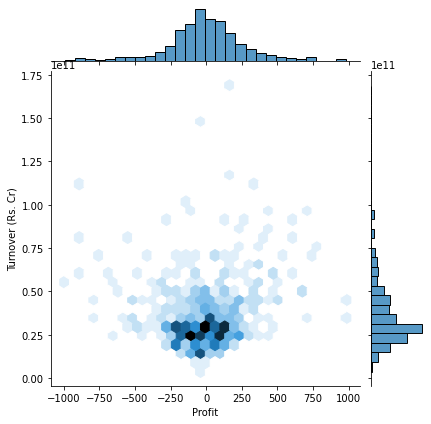

In [ ]:
sns.jointplot(x='Profit',y='Turnover (Rs. Cr)',data=df_IT1,kind='hex')

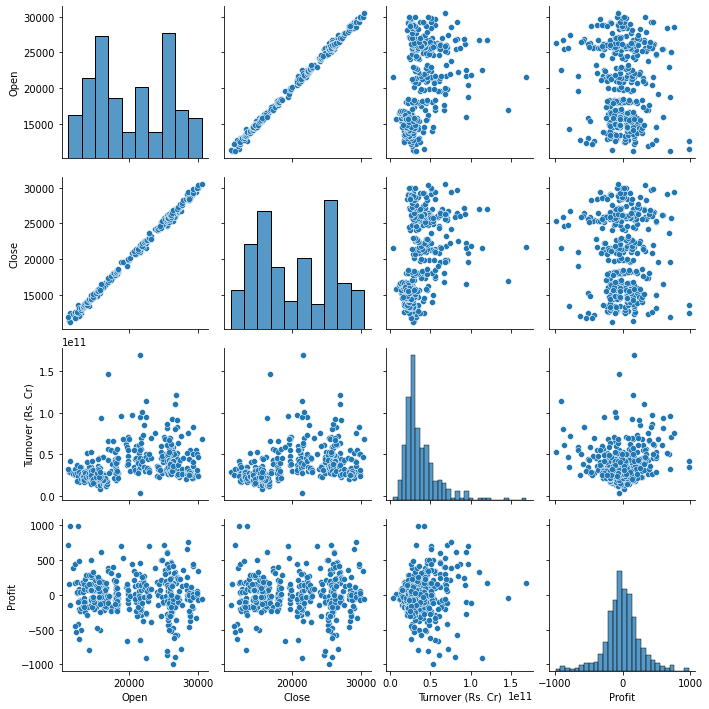

In [ ]:
sns.pairplot(df_IT1)

**Pharma Sector**


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df_Phar = pd.read_csv(io.BytesIO(uploaded['Pharma_Sector_Nifty.csv']))
df_Phar

Saving Pharma_Sector_Nifty.csv to Pharma_Sector_Nifty.csv


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2019-12-02,8195.45,8198.95,8056.20,8128.95,26352824,1352.79
1,2019-12-03,8167.60,8172.30,8027.05,8044.85,31300198,1350.44
2,2019-12-04,8032.00,8132.05,8021.80,8121.50,22103896,1376.95
3,2019-12-05,8104.35,8115.25,8030.15,8051.85,15365207,927.32
4,2019-12-06,8091.20,8152.25,7942.00,7957.55,24281681,1429.39
...,...,...,...,...,...,...,...
411,2021-07-26,14604.65,14711.20,14591.85,14652.55,14243445,1436.89
412,2021-07-27,14702.95,14713.15,13866.80,14018.65,32649725,5396.67
413,2021-07-28,14075.00,14092.00,13794.90,13964.75,24488683,3772.13
414,2021-07-29,14032.15,14072.60,13834.85,13920.35,24202908,2388.33


In [ ]:
print(df_Phar.shape)

(416, 7)


In [ ]:
print(df_Phar.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)'],
      dtype='object')


In [ ]:
print(df_Phar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               416 non-null    object 
 1   Open               416 non-null    float64
 2   High               416 non-null    float64
 3   Low                416 non-null    float64
 4   Close              416 non-null    float64
 5   Shares Traded      416 non-null    int64  
 6   Turnover (Rs. Cr)  416 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.9+ KB
None


In [ ]:
df_Phar.isna().sum()/len(df_Phar)*100

Date                 0.0
Open                 0.0
High                 0.0
Low                  0.0
Close                0.0
Shares Traded        0.0
Turnover (Rs. Cr)    0.0
dtype: float64

In [ ]:
df_Phar1=df_Phar[['Date','Open','Close','Turnover (Rs. Cr)']]
df_Phar1['Turnover (Rs. Cr)'] = df_Phar1['Turnover (Rs. Cr)'] * 10000000
df_Phar1.head()

,Date,Open,Close,Turnover (Rs. Cr)
0,2019-12-02,8195.45,8128.95,1.352790e+10
1,2019-12-03,8167.60,8044.85,1.350440e+10
2,2019-12-04,8032.00,8121.50,1.376950e+10
3,2019-12-05,8104.35,8051.85,9.273200e+09
4,2019-12-06,8091.20,7957.55,1.429390e+10


In [ ]:
df_Phar1['Profit']=df_Phar1.Close-df_Phar1.Open
df_Phar1.Profit
df_Phar1['Profit']=df_Phar1.Profit
df_Phar1

,Date,Open,Close,Turnover (Rs. Cr),Profit
0,2019-12-02,8195.45,8128.95,1.352790e+10,-66.50
1,2019-12-03,8167.60,8044.85,1.350440e+10,-122.75
2,2019-12-04,8032.00,8121.50,1.376950e+10,89.50
3,2019-12-05,8104.35,8051.85,9.273200e+09,-52.50
4,2019-12-06,8091.20,7957.55,1.429390e+10,-133.65
...,...,...,...,...,...
411,2021-07-26,14604.65,14652.55,1.436890e+10,47.90
412,2021-07-27,14702.95,14018.65,5.396670e+10,-684.30
413,2021-07-28,14075.00,13964.75,3.772130e+10,-110.25
414,2021-07-29,14032.15,13920.35,2.388330e+10,-111.80


In [ ]:
def graph():
    fig = go.Figure(data=[
    go.Bar(name='Pharma_Sector_Closing', y=df_Phar1['Close'], x=df_Phar1["Date"]),
    ])
# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.5,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

In [ ]:
def graph():    
    fig = px.line(df_Phar1, x="Date", y="Profit", title='Pharma profit/loss')

# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.5,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

In [ ]:
def graph():    
    fig = px.bar(df_Phar1, x="Date", y="Turnover (Rs. Cr)", title='Pharma Turnover (Rs. Cr)')
     
# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

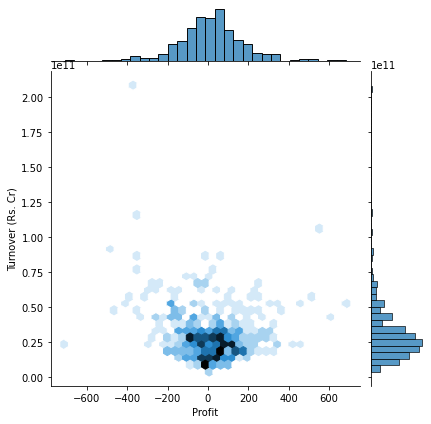

In [ ]:
sns.jointplot(x='Profit',y='Turnover (Rs. Cr)',data=df_Phar1,kind='hex')

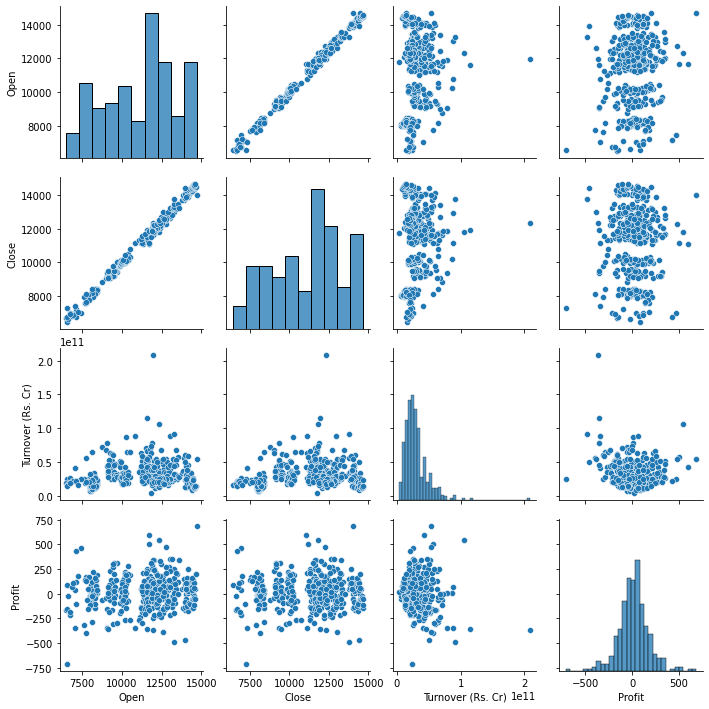

In [ ]:
sns.pairplot(df_Phar1)



**Financial Service Sector**



****

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df_fin = pd.read_csv(io.BytesIO(uploaded['Financial_Services_Sector_Nifty.csv']))
df_fin

Saving Financial_Services_Sector_Nifty.csv to Financial_Services_Sector_Nifty.csv


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2019-12-02,14236.35,14237.90,14102.25,14163.05,169032970,8418.14
1,2019-12-03,14181.20,14184.15,14070.20,14140.45,138183496,6974.87
2,2019-12-04,14108.20,14265.50,14068.10,14246.55,138218699,7670.04
3,2019-12-05,14265.50,14305.35,14156.90,14194.05,126793659,7193.56
4,2019-12-06,14227.30,14258.05,13984.80,14041.85,160331944,8101.47
...,...,...,...,...,...,...,...
411,2021-07-26,16574.50,16632.10,16462.55,16574.85,104006312,7714.92
412,2021-07-27,16615.60,16685.35,16497.65,16529.15,116529115,10378.84
413,2021-07-28,16525.55,16532.35,16233.45,16444.75,113324516,9296.74
414,2021-07-29,16517.15,16563.85,16451.25,16513.60,101536422,8552.66


In [ ]:
df_fin.isna().sum()/len(df_fin)*100

Date                 0.0
Open                 0.0
High                 0.0
Low                  0.0
Close                0.0
Shares Traded        0.0
Turnover (Rs. Cr)    0.0
dtype: float64

In [ ]:
df_fin1=df_fin[['Date','Open','Close','Turnover (Rs. Cr)']]
df_fin1['Turnover (Rs. Cr)'] = df_fin1['Turnover (Rs. Cr)'] * 10000000
df_fin1.head()

,Date,Open,Close,Turnover (Rs. Cr)
0,2019-12-02,14236.35,14163.05,8.418140e+10
1,2019-12-03,14181.20,14140.45,6.974870e+10
2,2019-12-04,14108.20,14246.55,7.670040e+10
3,2019-12-05,14265.50,14194.05,7.193560e+10
4,2019-12-06,14227.30,14041.85,8.101470e+10


In [ ]:
df_fin1['Profit']=df_fin1.Close-df_fin1.Open
df_fin1.Profit
df_fin1['Profit']=df_fin1.Profit
df_fin1

,Date,Open,Close,Turnover (Rs. Cr),Profit
0,2019-12-02,14236.35,14163.05,8.418140e+10,-73.30
1,2019-12-03,14181.20,14140.45,6.974870e+10,-40.75
2,2019-12-04,14108.20,14246.55,7.670040e+10,138.35
3,2019-12-05,14265.50,14194.05,7.193560e+10,-71.45
4,2019-12-06,14227.30,14041.85,8.101470e+10,-185.45
...,...,...,...,...,...
411,2021-07-26,16574.50,16574.85,7.714920e+10,0.35
412,2021-07-27,16615.60,16529.15,1.037884e+11,-86.45
413,2021-07-28,16525.55,16444.75,9.296740e+10,-80.80
414,2021-07-29,16517.15,16513.60,8.552660e+10,-3.55


In [ ]:
def graph():
    fig = go.Figure(data=[
    go.Bar(name='Financial_Service_Sector_Closing', y=df_fin1['Close'], x=df_fin1["Date"]),
    ])
# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.5,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

In [ ]:
def graph():    
    fig = px.line(df_fin1, x="Date", y="Profit", title='Financial Service Sector profit/loss')

# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.5,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

In [ ]:
def graph():    
    fig = px.bar(df_fin1, x="Date", y="Turnover (Rs. Cr)", title='Pharma Turnover (Rs. Cr)')
     
# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

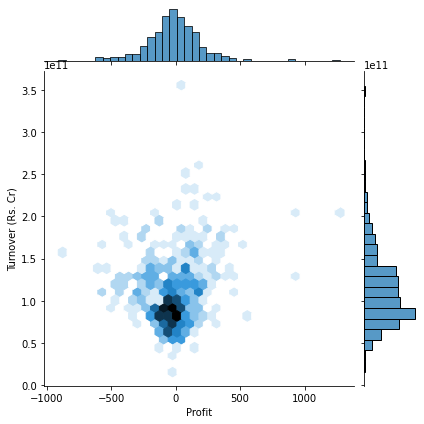

In [ ]:
sns.jointplot(x='Profit',y='Turnover (Rs. Cr)',data=df_fin1,kind='hex')

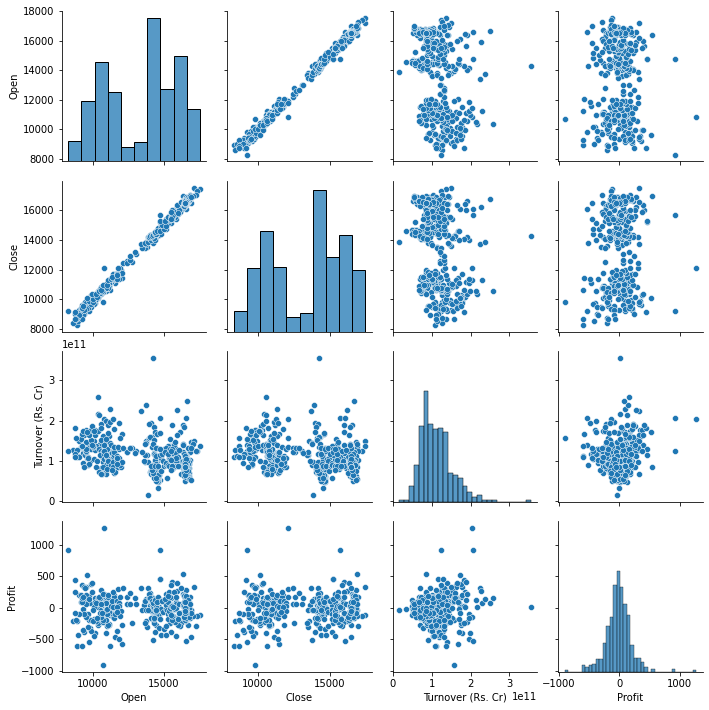

In [ ]:
sns.pairplot(df_fin1)

**Auto Mobile Sector**


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df_Auto = pd.read_csv(io.BytesIO(uploaded['Auto_Sector_Nifty1.csv']))
df_Auto

Saving Auto_Sector_Nifty1.csv to Auto_Sector_Nifty1.csv


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2019-12-02,8070.70,8087.35,7995.15,8012.75,66566458,2461.72
1,2019-12-03,8021.65,8055.25,7931.75,7964.25,51977605,2313.92
2,2019-12-04,7946.65,8043.90,7916.95,7996.55,107569542,3002.72
3,2019-12-05,8015.30,8045.50,7928.15,7941.80,58799891,2151.78
4,2019-12-06,7964.20,7971.80,7781.05,7806.60,67759510,2297.18
...,...,...,...,...,...,...,...
412,2021-07-26,10204.65,10212.65,10127.15,10137.95,41198611,1935.09
413,2021-07-27,10153.15,10217.10,10047.65,10094.35,75265962,2922.39
414,2021-07-28,10119.10,10122.55,9947.95,10000.40,52737251,2608.35
415,2021-07-29,10021.00,10027.95,9945.80,9956.65,79991836,4005.24


In [ ]:
df_Auto.isna().sum()/len(df_Auto)*100

Date                 0.0
Open                 0.0
High                 0.0
Low                  0.0
Close                0.0
Shares Traded        0.0
Turnover (Rs. Cr)    0.0
dtype: float64

In [ ]:
df_Auto1=df_Auto[['Date','Open','Close','Turnover (Rs. Cr)']]
df_Auto1['Turnover (Rs. Cr)'] = df_Auto1['Turnover (Rs. Cr)'] * 10000000
df_Auto1.head()

,Date,Open,Close,Turnover (Rs. Cr)
0,2019-12-02,8070.70,8012.75,2.461720e+10
1,2019-12-03,8021.65,7964.25,2.313920e+10
2,2019-12-04,7946.65,7996.55,3.002720e+10
3,2019-12-05,8015.30,7941.80,2.151780e+10
4,2019-12-06,7964.20,7806.60,2.297180e+10


In [ ]:
df_Auto1['Profit']=df_Auto1.Close-df_Auto1.Open
df_Auto1.Profit
df_Auto1['Profit']=df_Auto1.Profit
df_Auto1

,Date,Open,Close,Turnover (Rs. Cr),Profit
0,2019-12-02,8070.70,8012.75,2.461720e+10,-57.95
1,2019-12-03,8021.65,7964.25,2.313920e+10,-57.40
2,2019-12-04,7946.65,7996.55,3.002720e+10,49.90
3,2019-12-05,8015.30,7941.80,2.151780e+10,-73.50
4,2019-12-06,7964.20,7806.60,2.297180e+10,-157.60
...,...,...,...,...,...
412,2021-07-26,10204.65,10137.95,1.935090e+10,-66.70
413,2021-07-27,10153.15,10094.35,2.922390e+10,-58.80
414,2021-07-28,10119.10,10000.40,2.608350e+10,-118.70
415,2021-07-29,10021.00,9956.65,4.005240e+10,-64.35


In [ ]:
def graph():
    fig = go.Figure(data=[
    go.Bar(name='Auto_Sector_Closing', y=df_Auto1['Close'], x=df_Auto1["Date"]),
    ])
# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.5,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

In [ ]:
def graph():    
    fig = px.line(df_Auto1, x="Date", y="Profit", title='Auto Sector profit/loss')

# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.5,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

In [ ]:
def graph():    
    fig = px.bar(df_Auto1, x="Date", y="Turnover (Rs. Cr)", title='Auto Turnover (Rs. Cr)')
     
# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

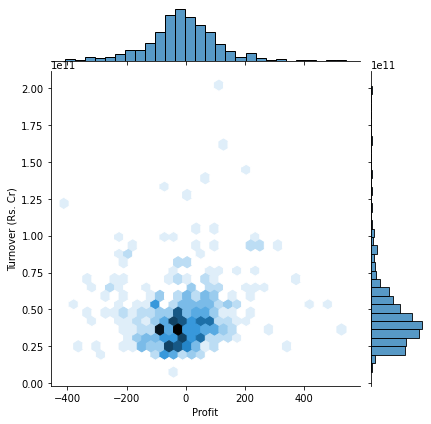

In [ ]:
sns.jointplot(x='Profit',y='Turnover (Rs. Cr)',data=df_Auto1,kind='hex')

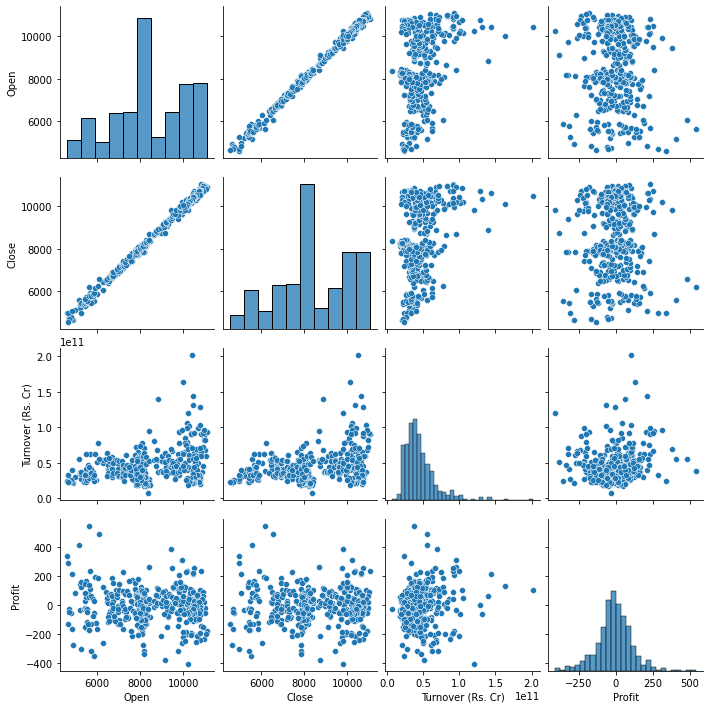

In [ ]:
sns.pairplot(df_Auto1)

**Metal Sector**

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df_Met = pd.read_csv(io.BytesIO(uploaded['Metal_Sector_Nifty1.csv']))
df_Met

Saving Metal_Sector_Nifty1.csv to Metal_Sector_Nifty1 (1).csv


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2019-12-02,2631.85,2637.10,2612.15,2632.65,80531419,1290.15
1,2019-12-03,2627.85,2629.25,2555.45,2564.20,138745383,2190.72
2,2019-12-04,2536.80,2613.15,2514.00,2604.00,148570248,2607.45
3,2019-12-05,2605.70,2611.20,2535.85,2543.95,100777191,1517.34
4,2019-12-06,2551.05,2571.50,2516.55,2535.85,119518611,1941.54
...,...,...,...,...,...,...,...
411,2021-07-26,5402.60,5421.90,5350.00,5387.40,171774084,5343.29
412,2021-07-27,5432.55,5499.65,5405.55,5465.90,200771084,6137.52
413,2021-07-28,5483.05,5541.30,5378.20,5532.80,212741103,6010.50
414,2021-07-29,5571.90,5852.45,5544.75,5810.75,482355239,14837.85


In [ ]:
df_Met.isna().sum()/len(df_Met)*100

Date                 0.0
Open                 0.0
High                 0.0
Low                  0.0
Close                0.0
Shares Traded        0.0
Turnover (Rs. Cr)    0.0
dtype: float64

In [ ]:
df_Met1=df_Met[['Date','Open','Close','Turnover (Rs. Cr)']]
df_Met1['Turnover (Rs. Cr)'] = df_Met1['Turnover (Rs. Cr)'] * 10000000
df_Met1.head()

,Date,Open,Close,Turnover (Rs. Cr)
0,2019-12-02,2631.85,2632.65,1.290150e+10
1,2019-12-03,2627.85,2564.20,2.190720e+10
2,2019-12-04,2536.80,2604.00,2.607450e+10
3,2019-12-05,2605.70,2543.95,1.517340e+10
4,2019-12-06,2551.05,2535.85,1.941540e+10


In [ ]:
df_Met1['Profit']=df_Met1.Close-df_Met1.Open
df_Met1.Profit
df_Met1['Profit']=df_Met1.Profit
df_Met1

,Date,Open,Close,Turnover (Rs. Cr),Profit
0,2019-12-02,2631.85,2632.65,1.290150e+10,0.80
1,2019-12-03,2627.85,2564.20,2.190720e+10,-63.65
2,2019-12-04,2536.80,2604.00,2.607450e+10,67.20
3,2019-12-05,2605.70,2543.95,1.517340e+10,-61.75
4,2019-12-06,2551.05,2535.85,1.941540e+10,-15.20
...,...,...,...,...,...
411,2021-07-26,5402.60,5387.40,5.343290e+10,-15.20
412,2021-07-27,5432.55,5465.90,6.137520e+10,33.35
413,2021-07-28,5483.05,5532.80,6.010500e+10,49.75
414,2021-07-29,5571.90,5810.75,1.483785e+11,238.85


In [ ]:
def graph():
    fig = go.Figure(data=[
    go.Bar(name='Metal_Sector_Closing', y=df_Met1['Close'], x=df_Met1["Date"]),
    ])
# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.5,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

In [ ]:
def graph():    
    fig = px.line(df_Met1, x="Date", y="Profit", title='Metal Sector profit/loss')

# Change the bar mode
    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.5,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

In [ ]:
def graph():    
    fig = px.bar(df_Met1, x="Date", y="Turnover (Rs. Cr)", title='Metal Turnover (Rs. Cr)')
     
# Change the bar mode

    fig.update_layout(barmode='group')
    
    fig.add_vrect(
    x0="2019-12-02", x1="2020-03-24",
    annotation_text="PRE COVID-19", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="skyblue", opacity=0.8,
    layer="below", line_width=0
    )
    #Lockdown
    fig.add_vrect(
    x0="2020-03-24", x1="2020-07-01",
    annotation_text="Lockdown", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="yellow", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE 1
    fig.add_vrect(
    x0="2020-07-01", x1="2020-11-15",
    annotation_text="WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
    #Downfall_of_WAVE_1
    fig.add_vrect(
    x0="2020-11-15", x1="2021-03-15",
    annotation_text="DOWNFALL_OF_WAVE_1", annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="lightgreen", opacity=0.8,
    layer="below", line_width=0
    )
    #WAVE_2
    fig.add_vrect(
    x0="2021-03-15", x1="2021-07-31",
    annotation_text="WAVE_2",annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green", opacity=0.6,
    layer="below", line_width=0
    )
#ig.update_xaxes(showspikes = True, spikecolor = 'black', spikedash = 'dash',
 #                   spikesnap = 'cursor', spikemode = 'across', spikethickness = 1)
#ig.update_layout(spikedistance = 1000, hoverdistance = 100)

    fig.update_xaxes(showspikes=True)
    fig.update_yaxes(showspikes=True)
    fig.show()
graph()

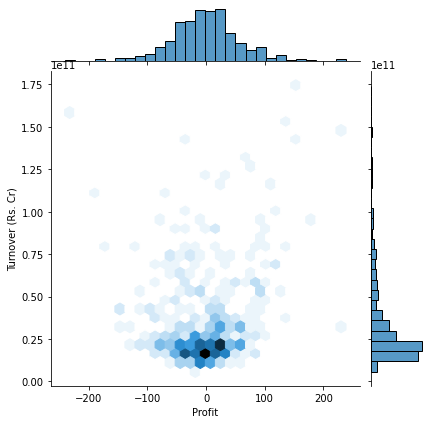

In [ ]:
sns.jointplot(x='Profit',y='Turnover (Rs. Cr)',data=df_Met1,kind='hex')

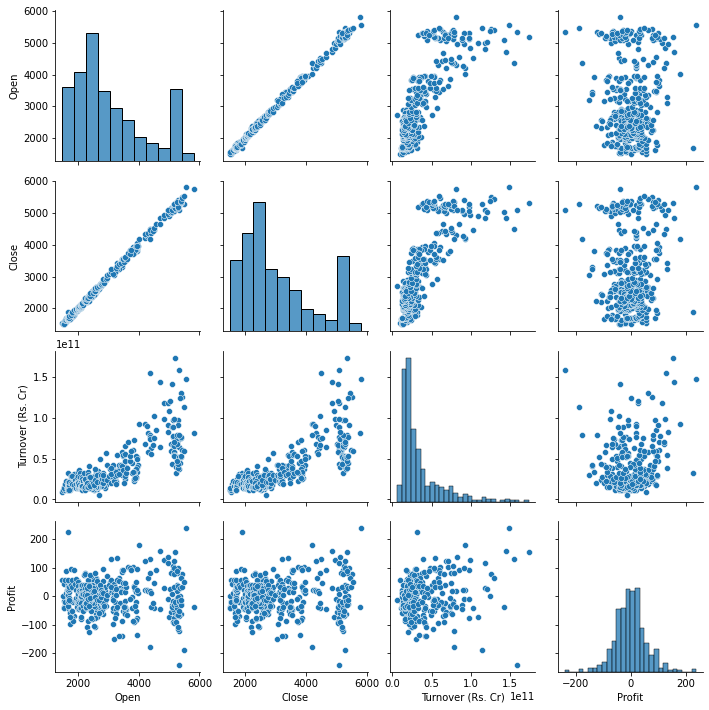

In [ ]:
sns.pairplot(df_Met1)

# **Hypothesis Testing : Z Test**

In [ ]:
df_Met1.head(10)

,Date,Open,Close,Turnover (Rs. Cr),Profit
0,2019-12-02,2631.85,2632.65,1.290150e+10,0.80
1,2019-12-03,2627.85,2564.20,2.190720e+10,-63.65
2,2019-12-04,2536.80,2604.00,2.607450e+10,67.20
3,2019-12-05,2605.70,2543.95,1.517340e+10,-61.75
4,2019-12-06,2551.05,2535.85,1.941540e+10,-15.20
5,2019-12-09,2539.00,2551.70,1.459870e+10,12.70
6,2019-12-10,2549.00,2515.90,1.165150e+10,-33.10
7,2019-12-11,2524.65,2509.55,1.241790e+10,-15.10
8,2019-12-12,2525.40,2568.80,1.744390e+10,43.40
9,2019-12-13,2620.30,2626.75,2.926340e+10,6.45


In [ ]:
df_Met1['Turnover (Rs. Cr)'].mean()

35122439903.84615

In [ ]:
metal_population_mean = df_Met1['Turnover (Rs. Cr)'].mean()

In [ ]:
#precovid
df_Met1_precovid = df_Met1[(df_Met1['Date'] >= '2019-12-02') & (df_Met1['Date'] <= '2020-03-24')]

#lockdown
df_Met1_lockdown = df_Met1[(df_Met1['Date'] >= '2020-03-25') & (df_Met1['Date'] <= '2020-07-01')]

#Wave 1
df_Met1_Wave1 = df_Met1[(df_Met1['Date'] >= '2020-07-02') & (df_Met1['Date'] <= '2020-11-15')]

#Downfall of wave 1
df_Met1_DownfallWave1 = df_Met1[(df_Met1['Date'] >= '2020-11-16') & (df_Met1['Date'] <= '2021-03-15')]

#Wave2
df_Met1_Wave2 = df_Met1[(df_Met1['Date'] >= '2021-03-16') & (df_Met1['Date'] <= '2021-07-31')]


In [ ]:
import scipy.stats as stats
def Z_test(X,mean):
   ttest,p_value = ztest(X,value=mean, alternative ="larger")
   print(ttest,p_value)
   if p_value < 0.05: 
    return "Alternate Hypothesis"
   else:
    return "Null Hypothesis"

In [ ]:
#Z Test precovid  Metal Turnover (Rs. Cr) 
Z_test(df_Met1_precovid['Turnover (Rs. Cr)'], metal_population_mean)    

-23.929257813880213 1.0


'Null Hypothesis'

In [ ]:
#Z Test lockdown  Metal Turnover (Rs. Cr)  
Z_test(df_Met1_lockdown['Turnover (Rs. Cr)'], metal_population_mean) 

-27.075498158799473 1.0


'Null Hypothesis'

In [ ]:
#Z Test wave1  Metal Turnover (Rs. Cr)  
Z_test(df_Met1_Wave1['Turnover (Rs. Cr)'] , metal_population_mean) 

-24.42800976741512 1.0


'Null Hypothesis'

In [ ]:
#Z Test DownfallWave1  Metal Turnover (Rs. Cr)  
Z_test(df_Met1_DownfallWave1['Turnover (Rs. Cr)'] , metal_population_mean) 

0.8381204726208877 0.20098152298347172


'Null Hypothesis'

In [ ]:
#t Test wave2  Metal Turnover (Rs. Cr)  
Z_test(df_Met1_Wave2['Turnover (Rs. Cr)'] , metal_population_mean) 

11.732922928593313 4.321094085927933e-32


'Alternate Hypothesis'

In [ ]:
IT_population_mean = df_IT1['Turnover (Rs. Cr)'].mean()
IT_population_mean

37414392067.30769

In [ ]:
#precovid
df_IT1_precovid = df_IT1[(df_IT1['Date'] >= '2019-12-02') & (df_IT1['Date'] <= '2020-03-24')]

#lockdown
df_IT1_lockdown = df_IT1[(df_IT1['Date'] >= '2020-03-25') & (df_IT1['Date'] <= '2020-07-01')]

#Wave 1
df_IT1_Wave1 = df_IT1[(df_IT1['Date'] >= '2020-07-02') & (df_IT1['Date'] <= '2020-11-15')]

#Downfall of wave 1
df_IT1_DownfallWave1 = df_IT1[(df_IT1['Date'] >= '2020-11-16') & (df_IT1['Date'] <= '2021-03-15')]

#Wave2
df_IT1_Wave2 = df_IT1[(df_IT1['Date'] >= '2021-03-16') & (df_IT1['Date'] <= '2021-07-31')]

In [ ]:

#Z_test(df_IT1_lockdown['Profit'], IT_population_mean)
ztest(df_IT1_lockdown['Profit'],value=IT_population_mean, alternative ="larger")

(0.4415177119283863, 0.32941912091499476)

In [ ]:
from statsmodels.stats.weightstats import ztest

**IT Sector Z test**

In [ ]:
#t Test precovid  IT Turnover (Rs. Cr) 
IT_population_mean = df_IT1['Turnover (Rs. Cr)'].mean()
Z_test(df_IT1_precovid['Turnover (Rs. Cr)'], IT_population_mean)

-17.241897523220825 1.0


'Null Hypothesis'

In [ ]:
#t Test lockdown  IT Turnover (Rs. Cr)  
Z_test(df_IT1_lockdown['Turnover (Rs. Cr)'], IT_population_mean)

-13.229115289847975 1.0


'Null Hypothesis'

In [ ]:
#t Test wave1  IT Turnover (Rs. Cr)  
Z_test(df_IT1_Wave1['Turnover (Rs. Cr)'], IT_population_mean)

3.4124877368555926 0.0003218641161018358


'Alternate Hypothesis'

In [ ]:
#t Test downfallwave1  IT Turnover (Rs. Cr)  
Z_test(df_IT1_DownfallWave1['Turnover (Rs. Cr)'], IT_population_mean)

4.633237278603973 1.7999576383158696e-06


'Alternate Hypothesis'

In [ ]:
#t Test downfallwave1  IT Turnover (Rs. Cr)  
Z_test(df_IT1_Wave2['Turnover (Rs. Cr)'], IT_population_mean)

1.9815601077958813 0.023764247858741958


'Alternate Hypothesis'

**Financial**


In [ ]:
df_fin1

,Date,Open,Close,Turnover (Rs. Cr),Profit
0,2019-12-02,14236.35,14163.05,8.418140e+10,-73.30
1,2019-12-03,14181.20,14140.45,6.974870e+10,-40.75
2,2019-12-04,14108.20,14246.55,7.670040e+10,138.35
3,2019-12-05,14265.50,14194.05,7.193560e+10,-71.45
4,2019-12-06,14227.30,14041.85,8.101470e+10,-185.45
...,...,...,...,...,...
411,2021-07-26,16574.50,16574.85,7.714920e+10,0.35
412,2021-07-27,16615.60,16529.15,1.037884e+11,-86.45
413,2021-07-28,16525.55,16444.75,9.296740e+10,-80.80
414,2021-07-29,16517.15,16513.60,8.552660e+10,-3.55


In [ ]:
#precovid
df_fin1_precovid = df_fin1[(df_fin1['Date'] >= '2019-12-02') & (df_fin1['Date'] <= '2020-03-24')]

#lockdown
df_fin1_lockdown = df_fin1[(df_fin1['Date'] >= '2020-03-25') & (df_fin1['Date'] <= '2020-07-01')]

#Wave 1
df_fin1_Wave1 = df_fin1[(df_fin1['Date'] >= '2020-07-02') & (df_fin1['Date'] <= '2020-11-15')]

#Downfall of wave 1
df_fin1_DownfallWave1 = df_fin1[(df_fin1['Date'] >= '2020-11-16') & (df_fin1['Date'] <= '2021-03-15')]

#Wave2
df_fin1_Wave2 = df_fin1[(df_fin1['Date'] >= '2021-03-16') & (df_fin1['Date'] <= '2021-07-31')]

In [ ]:
#t Test precovid  Financial Services Turnover (Rs. Cr) 
fin_population_mean = df_fin1['Turnover (Rs. Cr)'].mean()
Z_test(df_fin1_precovid['Turnover (Rs. Cr)'], fin_population_mean)

-7.507500227194682 0.9999999999999699


'Null Hypothesis'

In [ ]:
#t Test lockdown  Financial Turnover (Rs. Cr)  
Z_test(df_fin1_lockdown['Turnover (Rs. Cr)'], fin_population_mean)

7.722656993341498 5.696473083963998e-15


'Alternate Hypothesis'

In [ ]:
#t Test wave1  Financial Services Turnover (Rs. Cr) 
Z_test(df_fin1_Wave1['Turnover (Rs. Cr)'], fin_population_mean)

0.23123843777427683 0.4085647850261972


'Null Hypothesis'

In [ ]:
#t Test Downfall wave1  Financial Services Turnover (Rs. Cr) 
Z_test(df_fin1_DownfallWave1['Turnover (Rs. Cr)'], fin_population_mean)

3.637015408048656 0.00013790771901310076


'Alternate Hypothesis'

In [ ]:
#t Test wave2 Financial Services Turnover (Rs. Cr) 
Z_test(df_fin1_Wave2['Turnover (Rs. Cr)'], fin_population_mean)

-5.211978366849393 0.9999999065813294


'Null Hypothesis'

**Pharma Z Test**

In [ ]:
df_Phar1

,Date,Open,Close,Turnover (Rs. Cr),Profit
0,2019-12-02,8195.45,8128.95,1.352790e+10,-66.50
1,2019-12-03,8167.60,8044.85,1.350440e+10,-122.75
2,2019-12-04,8032.00,8121.50,1.376950e+10,89.50
3,2019-12-05,8104.35,8051.85,9.273200e+09,-52.50
4,2019-12-06,8091.20,7957.55,1.429390e+10,-133.65
...,...,...,...,...,...
411,2021-07-26,14604.65,14652.55,1.436890e+10,47.90
412,2021-07-27,14702.95,14018.65,5.396670e+10,-684.30
413,2021-07-28,14075.00,13964.75,3.772130e+10,-110.25
414,2021-07-29,14032.15,13920.35,2.388330e+10,-111.80


In [ ]:
#precovid
df_Phar1_precovid = df_Phar1[(df_Phar1['Date'] >= '2019-12-02') & (df_Phar1['Date'] <= '2020-03-24')]

#lockdown
df_Phar1_lockdown = df_Phar1[(df_Phar1['Date'] >= '2020-03-25') & (df_Phar1['Date'] <= '2020-07-01')]

#Wave 1
df_Phar1_Wave1 = df_Phar1[(df_Phar1['Date'] >= '2020-07-02') & (df_Phar1['Date'] <= '2020-11-15')]

#Downfall of wave 1
df_Phar1_DownfallWave1 = df_Phar1[(df_Phar1['Date'] >= '2020-11-16') & (df_Phar1['Date'] <= '2021-03-15')]

#Wave2
df_Phar1_Wave2 = df_Phar1[(df_Phar1['Date'] >= '2021-03-16') & (df_Phar1['Date'] <= '2021-07-31')]

In [ ]:
pharma_population_mean = df_Phar1['Turnover (Rs. Cr)'].mean()
pharma_population_mean

30435140144.23077

In [ ]:
# Z Test precovid Pharma Turnover (Rs. Cr)  
Z_test(df_Phar1_precovid['Turnover (Rs. Cr)'], pharma_population_mean)

-20.59109053566207 1.0


'Null Hypothesis'

In [ ]:
# Z Test lockdown Pharma Turnover (Rs. Cr)  
Z_test(df_Phar1_lockdown['Turnover (Rs. Cr)'], pharma_population_mean)

3.408866201947705 0.00032616732846592507


'Alternate Hypothesis'

In [ ]:
# Z Test wave1 Pharma Turnover (Rs. Cr)  
Z_test(df_Phar1_Wave1['Turnover (Rs. Cr)'], pharma_population_mean)

3.848276173824271 5.9475954891925204e-05


'Alternate Hypothesis'

In [ ]:
# Z Test downfall wave1 Pharma Turnover (Rs. Cr)  
Z_test(df_Phar1_DownfallWave1['Turnover (Rs. Cr)'], pharma_population_mean)

-0.40875331698542455 0.6586396489955718


'Null Hypothesis'

In [ ]:
# Z Test wave2 Pharma Turnover (Rs. Cr)  
Z_test(df_Phar1_Wave2['Turnover (Rs. Cr)'], pharma_population_mean)

-1.2161799950932441 0.88804181870429


'Null Hypothesis'

**Auto Sector Z Test**

In [ ]:
df_Auto1

,Date,Open,Close,Turnover (Rs. Cr),Profit
0,2019-12-02,8070.70,8012.75,2.461720e+10,-57.95
1,2019-12-03,8021.65,7964.25,2.313920e+10,-57.40
2,2019-12-04,7946.65,7996.55,3.002720e+10,49.90
3,2019-12-05,8015.30,7941.80,2.151780e+10,-73.50
4,2019-12-06,7964.20,7806.60,2.297180e+10,-157.60
...,...,...,...,...,...
412,2021-07-26,10204.65,10137.95,1.935090e+10,-66.70
413,2021-07-27,10153.15,10094.35,2.922390e+10,-58.80
414,2021-07-28,10119.10,10000.40,2.608350e+10,-118.70
415,2021-07-29,10021.00,9956.65,4.005240e+10,-64.35


In [ ]:
#precovid
df_Auto1_precovid = df_Auto1[(df_Auto1['Date'] >= '2019-12-02') & (df_Auto1['Date'] <= '2020-03-24')]

#lockdown
df_Auto1_lockdown = df_Auto1[(df_Auto1['Date'] >= '2020-03-25') & (df_Auto1['Date'] <= '2020-07-01')]

#Wave 1
df_Auto1_Wave1 = df_Auto1[(df_Auto1['Date'] >= '2020-07-02') & (df_Auto1['Date'] <= '2020-11-15')]

#Downfall of wave 1
df_Auto1_DownfallWave1 = df_Auto1[(df_Auto1['Date'] >= '2020-11-16') & (df_Auto1['Date'] <= '2021-03-15')]

#Wave2
df_Auto1_Wave2 = df_Auto1[(df_Auto1['Date'] >= '2021-03-16') & (df_Auto1['Date'] <= '2021-07-31')]

In [ ]:
Auto_population_mean = df_Auto1['Turnover (Rs. Cr)'].mean()
Auto_population_mean

45634674100.71942

In [ ]:
# Z Test precovid Pharma Turnover (Rs. Cr)
Z_test(df_Auto1_precovid['Turnover (Rs. Cr)'], Auto_population_mean)

-19.116878140089735 1.0


'Null Hypothesis'

In [ ]:
# Z Test lockdown Pharma Turnover (Rs. Cr)
Z_test(df_Auto1_lockdown['Turnover (Rs. Cr)'], Auto_population_mean)

-3.6108125129980633 0.9998473803689386


'Null Hypothesis'

In [ ]:
# Z Test wave1 Pharma Turnover (Rs. Cr)
Z_test(df_Auto1_Wave1['Turnover (Rs. Cr)'], Auto_population_mean)

-0.7888773587153723 0.7849081549965278


'Null Hypothesis'

In [ ]:
# Z Test DownfallWave1 Pharma Turnover (Rs. Cr)
Z_test(df_Auto1_DownfallWave1['Turnover (Rs. Cr)'], Auto_population_mean)

7.054318682432789 8.672422759233908e-13


'Alternate Hypothesis'

In [ ]:
# Z Test Wave2 Pharma Turnover (Rs. Cr)
Z_test(df_Auto1_Wave2['Turnover (Rs. Cr)'], Auto_population_mean)

-1.9101392236209462 0.9719423550401471


'Null Hypothesis'

In [ ]:
lst = [['IT', 'Null Hypothesis', 'Null Hypothesis', 'Alternate Hypothesis', 'Alternate Hypothesis', 'Alternate Hypothesis'], 
      ['Metal', 'Null Hypothesis', 'Null Hypothesis','Null Hypothesis', 'Null Hypothesis', 'Alternate Hypothesis'], 
      ['Financial Services', 'Null Hypothesis', 'Alternate Hypothesis','Null Hypothesis', 'Alternate Hypothesis', 'Null Hypothesis'],
      ['Pharma', 'Null Hypothesis', 'Alternate Hypothesis','Alternate Hypothesis', 'Null Hypothesis','Null Hypothesis'],
      ['Auto' , 'Null Hypothesis', 'Null Hypothesis', 'Alternate Hypothesis','Null Hypothesis', 'Null Hypothesis']
      ] 
      
df_Ztest = pd.DataFrame(lst, columns =['Sector', 'Precovid', 'Lockdown', 'Wave1', 'Downfall of Wave1', 'Wave2']) 

In [ ]:
df_Ztest.set_index('Sector',inplace=True)
df_Ztest

,Precovid,Lockdown,Wave1,Downfall of Wave1,Wave2
Sector,,,,,
IT,Null Hypothesis,Null Hypothesis,Alternate Hypothesis,Alternate Hypothesis,Alternate Hypothesis
Metal,Null Hypothesis,Null Hypothesis,Null Hypothesis,Null Hypothesis,Alternate Hypothesis
Financial Services,Null Hypothesis,Alternate Hypothesis,Null Hypothesis,Alternate Hypothesis,Null Hypothesis
Pharma,Null Hypothesis,Alternate Hypothesis,Alternate Hypothesis,Null Hypothesis,Null Hypothesis
Auto,Null Hypothesis,Null Hypothesis,Alternate Hypothesis,Null Hypothesis,Null Hypothesis


In [ ]:
df_Ztest=df_Ztest.style.set_properties(**{'padding': '5px', 'font-size': '12pt','text-align': 'center', 'border-color': 'black','border-style' :'solid' ,'border-width': '1px','border-collapse':'collapse'})

In [ ]:
df_Ztest

,Precovid,Lockdown,Wave1,Downfall of Wave1,Wave2
Sector,,,,,
IT,Null Hypothesis,Null Hypothesis,Alternate Hypothesis,Alternate Hypothesis,Alternate Hypothesis
Metal,Null Hypothesis,Null Hypothesis,Null Hypothesis,Null Hypothesis,Alternate Hypothesis
Financial Services,Null Hypothesis,Alternate Hypothesis,Null Hypothesis,Alternate Hypothesis,Null Hypothesis
Pharma,Null Hypothesis,Alternate Hypothesis,Alternate Hypothesis,Null Hypothesis,Null Hypothesis
Auto,Null Hypothesis,Null Hypothesis,Alternate Hypothesis,Null Hypothesis,Null Hypothesis


# **Stacked LSTM Predictive Model for 3rd wave of Covid-19**


In [ ]:
df_IT.head()

,Date,Open,High,Low,Close,Shares_Traded,Turnover (Rs. Cr)
0,2019-12-02,15056.85,15070.65,14819.40,14852.00,26527817,2233.28
1,2019-12-03,14870.90,14956.45,14808.40,14920.75,23102025,2103.53
2,2019-12-04,14918.50,15188.55,14896.60,15175.15,27219694,2295.68
3,2019-12-05,15164.15,15385.45,15101.80,15367.50,28794873,2450.08
4,2019-12-06,15383.45,15390.05,15269.25,15289.60,16934648,1363.79


In [ ]:
df_close = df_IT['Close']
df_close 

0      14852.00
1      14920.75
2      15175.15
3      15367.50
4      15289.60
         ...   
411    29940.40
412    29892.55
413    29954.15
414    30371.40
415    30480.05
Name: Close, Length: 416, dtype: float64

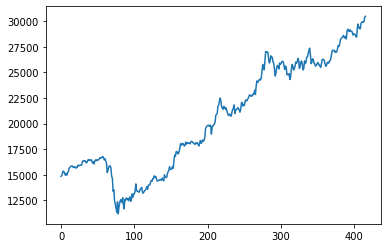

In [ ]:
plt.plot(df_close)

In [ ]:

from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
print(df_close)

[[0.19027536]
 [0.19383745]
 [0.20701849]
 [0.21698458]
 [0.2129484 ]
 [0.20608587]
 [0.19517162]
 [0.20469471]
 [0.19652651]
 [0.20833452]
 [0.21601051]
 [0.23095575]
 [0.23476396]
 [0.24006435]
 [0.24170162]
 [0.24278709]
 [0.23826387]
 [0.23454634]
 [0.23839341]
 [0.23809808]
 [0.23174589]
 [0.2353598 ]
 [0.23471214]
 [0.24647094]
 [0.243528  ]
 [0.24432591]
 [0.24734397]
 [0.24587769]
 [0.24767816]
 [0.26146023]
 [0.26853001]
 [0.26772692]
 [0.26952999]
 [0.26823209]
 [0.26048875]
 [0.25883334]
 [0.26708963]
 [0.27433557]
 [0.27425008]
 [0.27014655]
 [0.27202215]
 [0.27458945]
 [0.26674508]
 [0.25722457]
 [0.26440057]
 [0.25285939]
 [0.26793417]
 [0.27299623]
 [0.26898596]
 [0.27411537]
 [0.27213355]
 [0.27319052]
 [0.27763601]
 [0.28462808]
 [0.28305817]
 [0.28331464]
 [0.28855027]
 [0.28977822]
 [0.28340272]
 [0.27368274]
 [0.27890023]
 [0.26697046]
 [0.25617019]
 [0.20897699]
 [0.22010109]
 [0.2354142 ]
 [0.24272491]
 [0.24309019]
 [0.23231842]
 [0.19042561]
 [0.18143618]
 [0.11

In [ ]:
#splitting dataset into train and test split
training_size=int(len(df_close)*0.70)
test_size=len(df_close)-training_size
train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]

In [ ]:
training_size,test_size

(291, 125)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----30   31 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(260, 30)
(260,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(94, 30)
(94,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=30,verbose=1)

Epoch 1/200
9/9 [==============================] - 1s 61ms/step - loss: 0.0010 - val_loss: 6.7958e-04
Epoch 2/200
9/9 [==============================] - 1s 58ms/step - loss: 9.2445e-04 - val_loss: 6.9991e-04
Epoch 3/200
9/9 [==============================] - 1s 56ms/step - loss: 8.8743e-04 - val_loss: 6.3223e-04
Epoch 4/200
9/9 [==============================] - 0s 53ms/step - loss: 8.5310e-04 - val_loss: 9.6921e-04
Epoch 5/200
9/9 [==============================] - 0s 54ms/step - loss: 9.5647e-04 - val_loss: 0.0013
Epoch 6/200
9/9 [==============================] - 0s 52ms/step - loss: 0.0010 - val_loss: 9.3572e-04
Epoch 7/200
9/9 [==============================] - 0s 51ms/step - loss: 8.7475e-04 - val_loss: 5.7553e-04
Epoch 8/200
9/9 [==============================] - 0s 52ms/step - loss: 8.4013e-04 - val_loss: 7.2046e-04
Epoch 9/200
9/9 [==============================] - 1s 60ms/step - loss: 8.5676e-04 - val_loss: 6.7926e-04
Epoch 10/200
9/9 [==============================] - 0s 53m

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

18309.426332980238

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

27119.02096750659

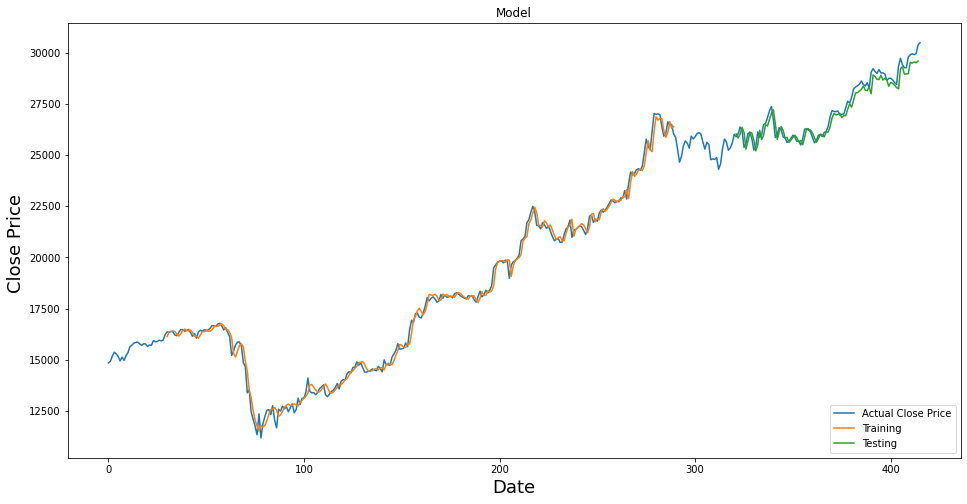

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=30
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot( )
plt.legend(['Actual Close Price', 'Training', 'Testing'], loc='lower right')
plt.show()

In [ ]:
len(test_data)

125

In [ ]:
x_input=test_data[95:].reshape(1,-1)
x_input.shape

(1, 30)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9744363]
31
1 day input [0.8905181  0.89862931 0.88489647 0.92580225 0.93422433 0.92686699
 0.92260284 0.93201972 0.92347588 0.92372717 0.92075573 0.90514988
 0.90956688 0.91030779 0.90581308 0.89908525 0.89428744 0.94092366
 0.96051906 0.94405312 0.9369937  0.93639786 0.96372623 0.96965097
 0.97203951 0.9695603  0.97275193 0.9943706  1.         0.97443628]
1 day output [[0.947791]]
2 day input [0.89862931 0.88489647 0.92580225 0.93422433 0.92686699 0.92260284
 0.93201972 0.92347588 0.92372717 0.92075573 0.90514988 0.90956688
 0.91030779 0.90581308 0.89908525 0.89428744 0.94092366 0.96051906
 0.94405312 0.9369937  0.93639786 0.96372623 0.96965097 0.97203951
 0.9695603  0.97275193 0.9943706  1.         0.97443628 0.94779098]
2 day output [[0.92873776]]
3 day input [0.88489647 0.92580225 0.93422433 0.92686699 0.92260284 0.93201972
 0.92347588 0.92372717 0.92075573 0.90514988 0.90956688 0.91030779
 0.90581308 0.89908525 0.89428744 0.94092366 0.96051906 0.94405312
 0.9369937  0.93639786

In [ ]:
day_new=np.arange(1,417)
day_pred=np.arange(417,447)

In [ ]:
len(df_close)

416

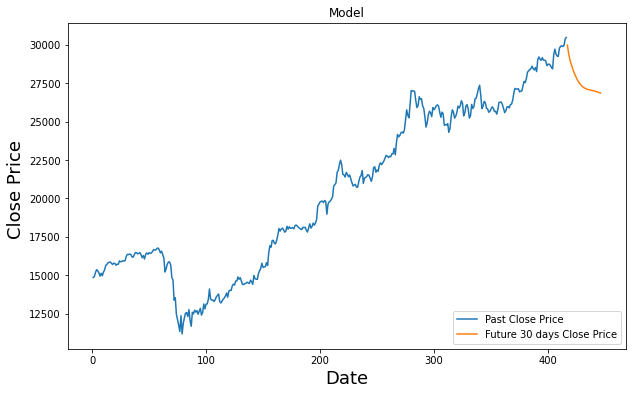

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(df_close[:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price ', fontsize=18)
plt.legend(['Past Close Price', 'Future 30 days Close Price'], loc='lower right')

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df_test = pd.read_csv(io.BytesIO(uploaded['testIT.csv']))
df_test

Saving testIT.csv to testIT.csv


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,29-Jul-2021,30037.20,30406.00,30037.10,30371.40,25993307,4692.89
1,30-Jul-2021,30546.85,30818.55,30438.35,30480.05,45659103,6836.19
2,02-Aug-2021,30681.95,30832.30,30547.00,30803.00,18892340,2997.82
3,03-Aug-2021,30974.75,31196.45,30872.35,31165.85,22705389,3913.36
4,04-Aug-2021,31296.80,31338.80,30895.45,30977.10,28174612,6902.13
5,05-Aug-2021,31025.15,31560.20,30980.90,31211.20,36239112,5198.42
6,06-Aug-2021,31251.20,31460.30,31057.60,31303.30,28200104,3942.49
7,09-Aug-2021,31523.50,31685.40,31324.75,31441.00,25408126,3611.99
8,10-Aug-2021,31489.95,31812.75,31431.15,31713.35,29858443,4344.13
9,11-Aug-2021,31767.90,31799.75,31522.40,31670.00,21176134,3299.56


In [ ]:
df_test.shape

(23, 7)

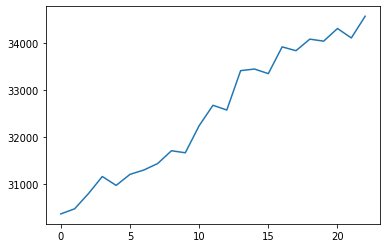

In [ ]:
plt.plot(df_test['Close'])